In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [17]:
import numpy as np
import time

from copy import deepcopy
from pprint import pprint
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as colors

rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 'monospace': ['Computer Modern Typewriter']})
rc('text', usetex=True)

matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.plots import diagnostic_plot, plot

In [3]:
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'pandeia_noise_residuals')

In [6]:
oversample_factor = 9

pandeia = np.load(os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test', f'detector_{oversample_factor}.npy'))

physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor)

In [4]:
calc = pandeia_input.build_pandeia_calc(array=model, lens=physical_lens, band='f106', oversample_factor=oversample_factor)

100%|██████████| 405/405 [00:00<00:00, 1411.14it/s]


Converting (405, 405) array to point sources...


100%|██████████| 405/405 [17:41<00:00,  2.62s/it]

Point source conversion complete: 164025 point sources


# Turn off cosmic ray noise

In [5]:
crs_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
crs_off_dict = deepcopy(calculation_dict)

crs_off_dict['noise']['crs'] = False
pprint(crs_off_dict)

crs_off_calc['calculation'] = crs_off_dict

crs_off, execution_time = pandeia_input.get_pandeia_image(crs_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'crs_off.npy'), crs_off)

{'effects': {'saturation': True},
 'noise': {'crs': False,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


Pandeia calculation complete
Execution time: 3:34:27


# Turn off detector dark current noise

In [6]:
dark_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
dark_off_dict = deepcopy(calculation_dict)

dark_off_dict['noise']['dark'] = False
pprint(dark_off_dict)

dark_off_calc['calculation'] = dark_off_dict

dark_off, execution_time = pandeia_input.get_pandeia_image(dark_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'dark_off.npy'), dark_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': False,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 3:56:18


# Turn off flat-field noise

In [7]:
ffnoise_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
ffnoise_off_dict = deepcopy(calculation_dict)

ffnoise_off_dict['noise']['ffnoise'] = False
pprint(ffnoise_off_dict)

ffnoise_off_calc['calculation'] = ffnoise_off_dict

ffnoise_off, execution_time = pandeia_input.get_pandeia_image(ffnoise_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'ffnoise_off.npy'), ffnoise_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': False,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 4:06:03


# Turn off detector read noise

In [5]:
readnoise_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
readnoise_off_dict = deepcopy(calculation_dict)

readnoise_off_dict['noise']['readnoise'] = False
pprint(readnoise_off_dict)

readnoise_off_calc['calculation'] = readnoise_off_dict

readnoise_off, execution_time = pandeia_input.get_pandeia_image(readnoise_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'readnoise_off.npy'), readnoise_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': False,
           'scatter': True}}
Performing Pandeia calculation...


/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/pandeia/engine/report.py:1012: RuntimeWarning: divide by zero encountered in log
  if np.log(abs(val)) < -1*precision and val != 0.0:


Pandeia calculation complete
Execution time: 3:51:09


# Turn off Echelle scattering noise

In [7]:
scatter_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
scatter_off_dict = deepcopy(calculation_dict)

scatter_off_dict['noise']['scatter'] = False
pprint(scatter_off_dict)

scatter_off_calc['calculation'] = scatter_off_dict

scatter_off, execution_time = pandeia_input.get_pandeia_image(scatter_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'scatter_off.npy'), scatter_off)

{'effects': {'saturation': True},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': False}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 3:54:13


# Turn off pixel saturation effects

In [8]:
saturation_off_calc = deepcopy(calc)

calculation_dict = pandeia_input.get_calculation_dict(init=True)
saturation_off_dict = deepcopy(calculation_dict)

saturation_off_dict['effects']['saturation'] = False
pprint(saturation_off_dict)

saturation_off_calc['calculation'] = saturation_off_dict

saturation_off, execution_time = pandeia_input.get_pandeia_image(saturation_off_calc)
print(f'Execution time: {execution_time}')

np.save(os.path.join(array_dir, 'saturation_off.npy'), saturation_off)

{'effects': {'saturation': False},
 'noise': {'crs': True,
           'dark': True,
           'excess': False,
           'ffnoise': True,
           'readnoise': True,
           'scatter': True}}
Performing Pandeia calculation...
Pandeia calculation complete
Execution time: 4:34:45


# Plot residuals

In [4]:
crs_off = np.load(os.path.join(array_dir, 'crs_off.npy'))
dark_off = np.load(os.path.join(array_dir, 'dark_off.npy'))
ffnoise_off = np.load(os.path.join(array_dir, 'ffnoise_off.npy'))
readnoise_off = np.load(os.path.join(array_dir, 'readnoise_off.npy'))
scatter_off = np.load(os.path.join(array_dir, 'scatter_off.npy'))
saturation_off = np.load(os.path.join(array_dir, 'saturation_off.npy'))

In [32]:
def get_norm(array_list):
    min_list, max_list = [], []
    for array in array_list:
        min_list.append(abs(np.min(array)))
        max_list.append(abs(np.max(array)))
    abs_min, abs_max = abs(np.min(min_list)), abs(np.max(max_list))
    limit = np.max([abs_min, abs_max])
    linear_width = np.abs(np.mean(np.concatenate(array_list)) + (1 * np.std(np.concatenate(array_list))))
    return colors.AsinhNorm(linear_width=linear_width, vmin=-limit, vmax=limit)

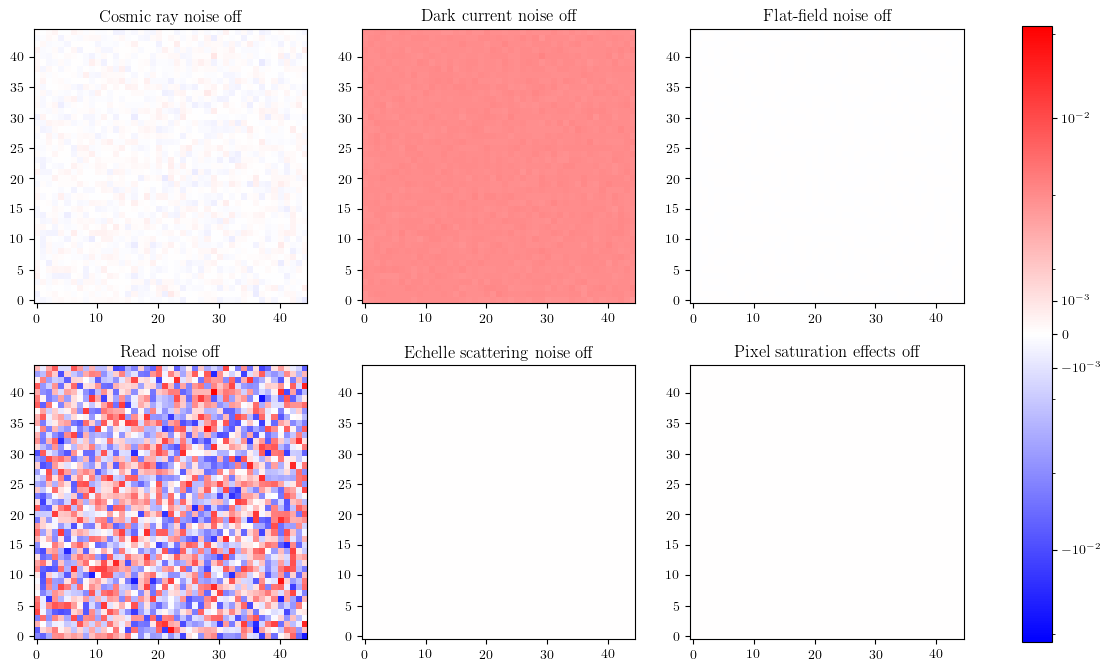

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

array_list = [pandeia - crs_off, pandeia - dark_off, pandeia - ffnoise_off, pandeia - readnoise_off, pandeia - scatter_off, pandeia - saturation_off]

im0 = ax[0,0].imshow(pandeia - crs_off, cmap='bwr', norm=get_norm(array_list))
ax[0,0].set_title('Cosmic ray noise off')

im1 = ax[0,1].imshow(pandeia - dark_off, cmap='bwr', norm=get_norm(array_list))
ax[0,1].set_title('Dark current noise off')

im2 = ax[0,2].imshow(pandeia - ffnoise_off, cmap='bwr', norm=get_norm(array_list))
ax[0,2].set_title('Flat-field noise off')

im3 = ax[1,0].imshow(pandeia - readnoise_off, cmap='bwr', norm=get_norm(array_list))
ax[1,0].set_title('Read noise off')

im4 = ax[1,1].imshow(pandeia - scatter_off, cmap='bwr', norm=get_norm(array_list))
ax[1,1].set_title('Echelle scattering noise off')

im5 = ax[1,2].imshow(pandeia - saturation_off, cmap='bwr', norm=get_norm(array_list))
ax[1,2].set_title('Pixel saturation effects off')

fig.colorbar(im0, ax=[ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2]])

plt.savefig(os.path.join(figure_dir, 'noise_asinh.png'))
plt.show()

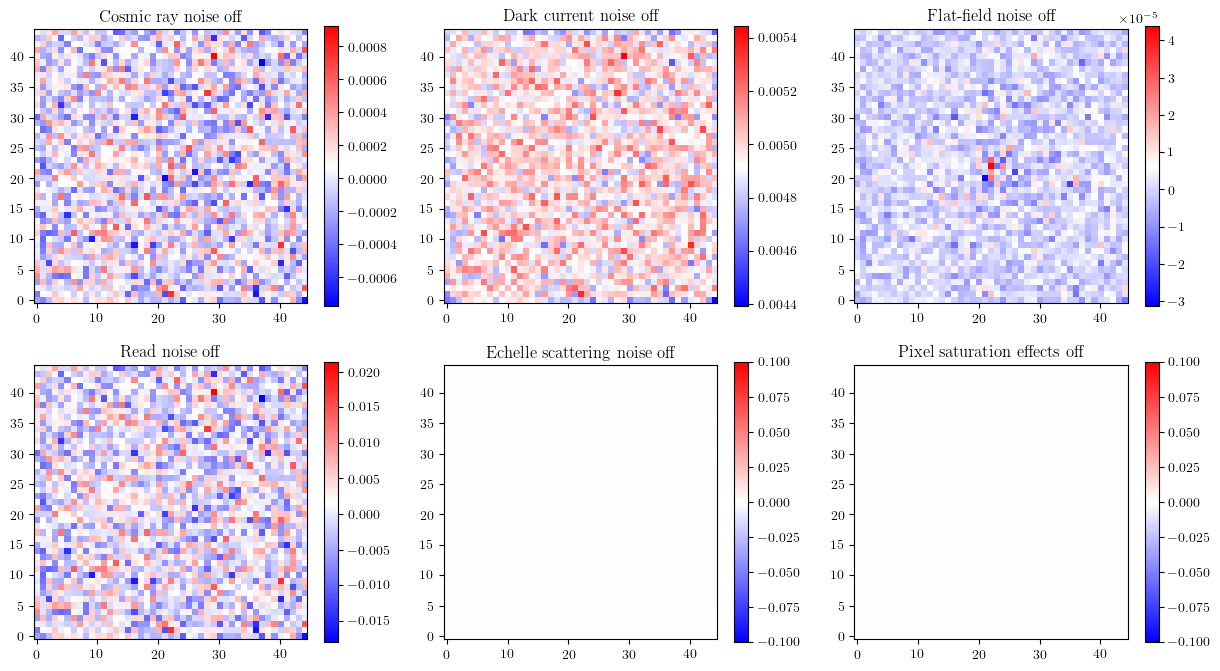

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

array_list = [pandeia - crs_off, pandeia - dark_off, pandeia - ffnoise_off, pandeia - readnoise_off, pandeia - scatter_off, pandeia - saturation_off]

ax0 = ax[0,0].imshow(pandeia - crs_off, cmap='bwr')
ax[0,0].set_title('Cosmic ray noise off')

ax1 = ax[0,1].imshow(pandeia - dark_off, cmap='bwr')
ax[0,1].set_title('Dark current noise off')

ax2 = ax[0,2].imshow(pandeia - ffnoise_off, cmap='bwr')
ax[0,2].set_title('Flat-field noise off')

ax3 = ax[1,0].imshow(pandeia - readnoise_off, cmap='bwr')
ax[1,0].set_title('Read noise off')

ax4 = ax[1,1].imshow(pandeia - scatter_off, cmap='bwr')
ax[1,1].set_title('Echelle scattering noise off')

ax5 = ax[1,2].imshow(pandeia - saturation_off, cmap='bwr')
ax[1,2].set_title('Pixel saturation effects off')

plt.colorbar(ax0, ax=ax[0,0])
plt.colorbar(ax1, ax=ax[0,1])
plt.colorbar(ax2, ax=ax[0,2])
plt.colorbar(ax3, ax=ax[1,0])
plt.colorbar(ax4, ax=ax[1,1])
plt.colorbar(ax5, ax=ax[1,2])

plt.savefig(os.path.join(figure_dir, 'noise_own_colorbars.png'))
plt.show()

In [42]:
print(np.count_nonzero(pandeia - scatter_off))
print(np.count_nonzero(pandeia - saturation_off))

0
0
